<a href="https://colab.research.google.com/github/Rajat-Hbtu/Machine-Learning-Algorithm/blob/main/Gradient_Descent_algorithm_and_visualization_of_single_feature_From_Scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
plt.style.use('seaborn')

In [ ]:
from sklearn.datasets import make_regression

x,y=make_regression(n_samples=2000,n_features=2,n_informative=1,noise=20,random_state=1)

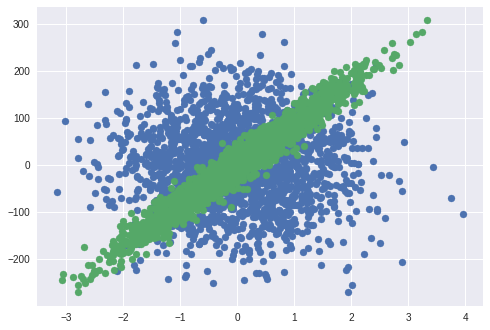

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.show()

In [ ]:
def hypothesies(X,theta):
  Y=theta[0]+theta[1]*X
  return Y

def gradient(X,Y,theta):
  
  m=X.shape[0]
  grd=np.zeros((2,))
  for a in range(m):
    y=hypothesies(X[a,1],theta)
    grd[0]+=Y[a]-y
    grd[1]+=(Y[a]-y)*X[a,1]

  return grd/m

def error(X,Y,theta):
  m=X.shape[0]
  err=0
  for a in range(m):
    y=hypothesies(X[a,1],theta)
    err += (Y[a]-y)**2

  return err/m


In [ ]:
def gradient_desent(X,Y,step=100,k=0.1):
  theta=np.zeros((2,))
  err=[]
  theta_list=[]
  for s in range(step):
    grad=gradient(X,Y,theta)
    e=error(X,Y,theta)
    err.append(e)
    theta[0]=theta[0]+k*grad[0]
    theta[1]=theta[1]+k*grad[1]
    theta_list.append((theta[0],theta[1]))
  return theta,err,theta_list

In [ ]:
theta,err,theta_li=gradient_desent(x[:1500,:],y[:1500])

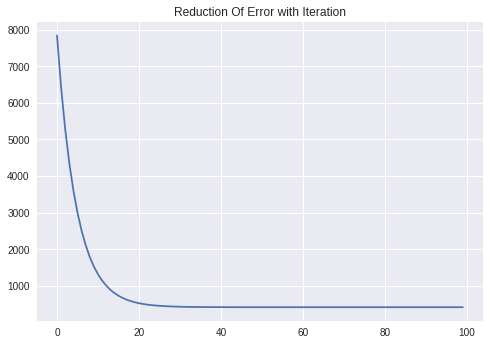

In [ ]:
plt.plot(err)
plt.title('Reduction Of Error with Iteration')
plt.show()

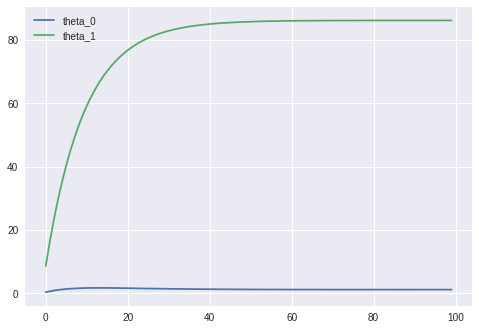

In [ ]:
theta_li=np.asarray(theta_li)
plt.plot(theta_li[:,0],label='theta_0')
plt.plot(theta_li[:,1],label='theta_1')
plt.legend()
plt.show()

In [ ]:
Y_pred=hypothesies(x[1500:,1],theta)

In [ ]:
y

array([152.16717215, 131.55489037,  -2.68133   , ..., -60.99741999,
       191.44938449,  32.12104905])

In [ ]:
def score(y,y_pred):
  num=np.sum((y-y_pred)**2)
  deno=np.sum((y-y.mean())**2)
  return 1-(num/deno)

In [ ]:
print(score(y[1500:],Y_pred))

0.9505450306392659


In [ ]:
theta

array([ 1.16227694, 86.1097162 ])

In [ ]:
t0=np.arange(-30,30)
t1=np.arange(60,120)

t0,t1=np.meshgrid(t0,t1)

J=np.zeros(t0.shape)
for i in range(J.shape[0]):
  for j in range(J.shape[1]):
    y_=t0[i,j]+t1[i,j]*x[:,1]
    J[i,j]=np.sum((y-y_)**2)/y.shape

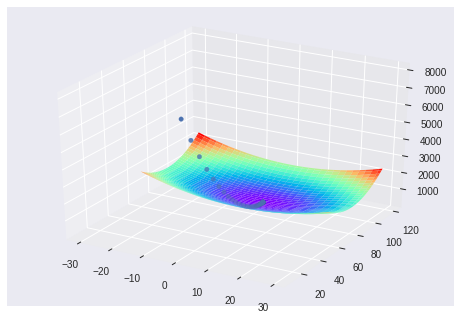

In [ ]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(t0,t1,J,cmap='rainbow')
axes.scatter(theta_li[:,0],theta_li[:,1],err)
plt.show()
